# Imports

In [1]:
import numpy as np
import pandas as pd

In [2]:
from utils.clustering import (create_subset_df, create_cluster_vectors,
    get_candidate_cluster_size_elbow_method, get_candidate_cluster_size_silhouette_method,
    create_clusters, create_cluster_plot, create_cluster_html_tiers)

# Grabbing Data

In [3]:
df_all = pd.read_pickle("../../FantasyData/data-frames/df_all_2005_2023.pkl")

In [4]:
season = 2023
position = 'QB'

In [5]:
df_review = df_all.query(f"season == {season} and position == '{position}' and games >= 5").copy()

### Verifying Data

In [6]:
assert(df_review["position"].unique()[0] == position)
assert(df_review["season"].unique()[0] == season)
assert(df_review["games"].max() == 17)

# Clustering

## Selecting Stats for Clusters

In [7]:
qb_cols = ['completions', 'attempts',
       'passing_yards', 'passing_tds', 'interceptions', 'sacks', 'sack_yards',
       'sack_fumbles', 'sack_fumbles_lost', 'passing_air_yards',
       'passing_yards_after_catch', 'passing_first_downs', 'passing_epa',
       'passing_2pt_conversions', 'pacr', 'dakota']

In [8]:
df_review["completion_percentage"] = df_review["completions"] / df_review["attempts"]

In [9]:
# subset_cols = ['completions', 'attempts',
#        'passing_yards', 'passing_tds', 'interceptions']

In [10]:
subset_cols = ['fantasy_points', 'passing_yards', 'passing_tds', 'rushing_tds', 'rushing_yards']
# subset_cols = ['fantasy_points', 'passing_yards', 'passing_tds', 'interceptions', 'completion_percentage', 'sacks']
# subset_cols = ['fantasy_points', 'pacr', 'dakota', 'passing_epa', 'passing_air_yards']
# subset_cols = ['fantasy_points', 'carries', 'rushing_yards', 'rushing_tds',]
# subset_cols = ['fantasy_points', 'rushing_epa', 'rushing_first_downs']

In [11]:
div_col = "games"
div_col_name = "game"

## Create Subset DFs

Season total version:

In [ ]:
subset_df, subset_cols = create_subset_df(df_review.copy(), subset_cols, drop_fantasy=False)

Per X version:

In [12]:
subset_df, subset_cols = create_subset_df(df_review.copy(), subset_cols, drop_fantasy=False,
                                          div_col=div_col, div_col_name=div_col_name)

## Prepping Model

In [13]:
X, X_scaled = create_cluster_vectors(subset_df)

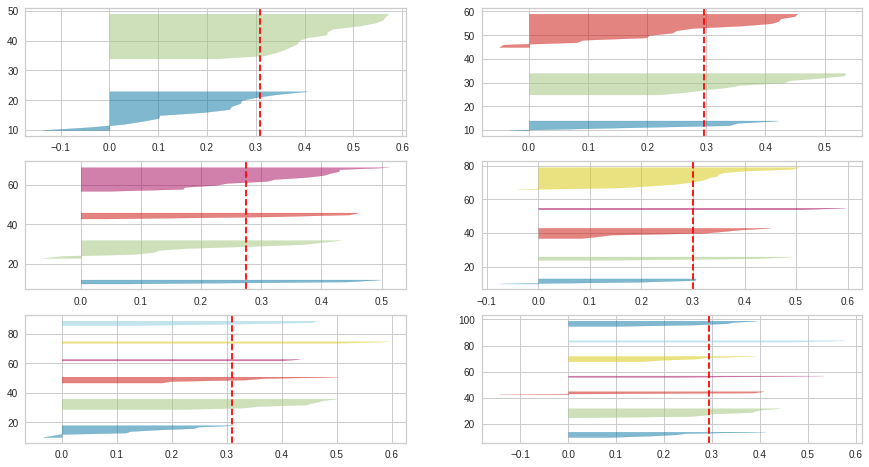

In [14]:
km = get_candidate_cluster_size_silhouette_method(X_scaled)

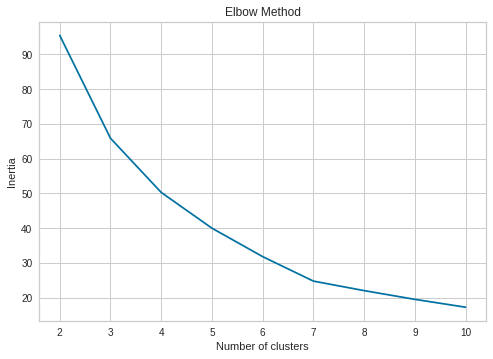

In [15]:
kmeans = get_candidate_cluster_size_elbow_method(X_scaled)

## Creating Cluster

Parameters for clustering:

In [ ]:
n = 6
clustering = kmeans

Cluster df and dict mapping for player names:

In [20]:
df_cluster, cluster_ranking = create_clusters(n, clustering, X, X_scaled, df_review, subset_df, subset_cols,)

## Cluster Plot

Want to probably save figures somewhere here: `../../interactive-2.0/<position>/<blog_post>/<fig_name>.html`

In [30]:
save_path = ""

In [28]:
create_cluster_plot(df_cluster, cluster_ranking, subset_cols,
                    save_path=save_path, font_size=12, marker_size=4, diagonal_is_visible=False,
                    width=1000, height=1000, showupperhalf=False, legend_size=14)

In [29]:
create_cluster_html_tiers(df_cluster)

			<div>
				<p class='blog-p-tag'>
					TODO
				</p>
				<div class='iframe-container'>
					<iframe class='large-iframe' data-src='TODO'></iframe>
				</div>
				<p class='blog-p-tag'>
					TODO:
				</p>
				<ul class='bullet-list'>
					<li><b>Cluster 0:</b> TODO</li>
					<li><b>Cluster 1:</b> TODO</li>
					<li><b>Cluster 2:</b> TODO</li>
					<li><b>Cluster 3:</b> TODO</li>
					<li><b>Cluster 4:</b> TODO</li>
					<li><b>Cluster 5:</b> TODO</li>
				</ul>
				<div style='display: flex; justify-content: space-evenly;''>
					<div>
						<b>Cluster 0 ()</b>
						<ul class='bullet-list'>
							<li>Gardner Minshew</li>
							<li>Taylor Heinicke</li>
							<li>Nick Mullens</li>
							<li>Easton Stick</li>
							<li>Derek Carr</li>
							<li>Deshaun Watson</li>
							<li>Joe Burrow</li>
							<li>Geno Smith</li>
							<li>Sam Howell</li>
						</ul>
					</div>

					<div>
						<b>Cluster 1 ()</b>
						<ul class='bullet-list'>
							<li>Russell Wilson</li>
							<li>Ja